In [37]:
import numpy as np
def load_data():
    x=np.loadtxt('x.dat')
    y=np.loadtxt('y.dat')
    
    print('X data loaded with shape {}'.format(x.shape))
    print('Y data loaded with shape {}'.format(y.shape))
    return x,y
x, y=load_data()

X data loaded with shape (69, 2)
Y data loaded with shape (69,)


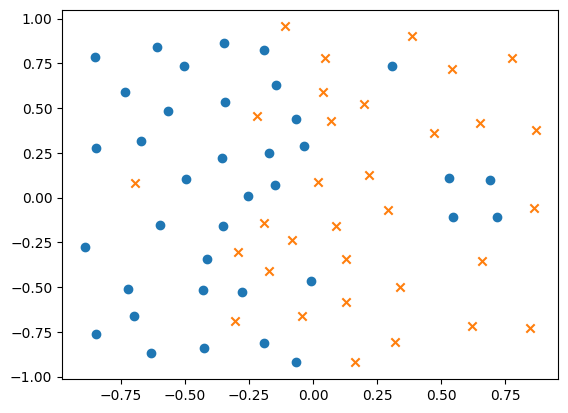

In [15]:
import matplotlib.pyplot as plt
plt.scatter(x[y==0][:,0], x[y==0][:,1], marker='o')
plt.scatter(x[y==1][:,0], x[y==1][:,1], marker='x')
plt.show()

In [34]:
point=np.array([-0.6, 0.7])

In [49]:
def weight(x,xi, tau):
    #squared exponential kerne
    return np.exp(-1./(2*tau**2)*np.linalg.norm((x-xi),ord=2))
def sigmoid(z):
    return 1./(1+np.exp(-z))
def h(theta, xi):
    #hypothesis h_theta(xi)
    linear=np.dot(np.transpose(theta),xi)
    return sigmoid(linear)

def locally_weighted_longistic_regression(X_train, y_train, x, tau=0.01, lambd=1e-4):
    import numpy as np
    #Adding bias column
    X_train=np.c_[np.ones(69), X_train]
    x=np.hstack(([1],x))
    #Number of features
    #Number of features
    m, n = X_train.shape
    np=X_train.shape[1]
    #Number of training examples
    m=len(y)
    #weight theta in R^n
    theta=np.zeros(n)
    #Lambda: Regularization parameter
    #Regilarization matrix for the Hessian
    regul=np.eye(n)*lambd
    #Diagonal Matrix
    D=np.eye(m)
    #Compute useful values to rehuse on D and z
    h_theta=[h(theta, X_train[i]) for i in range(m)]
    w_tau=[weight(x, X_train[i],tau) for i in range(m)]
    
    for i in range (m):
        D[i,i]=-w_tau[i]*h_theta[i]*(1-h_theta[i])
        #Hessian of J(0)
    H=np.dot(np.transpose(X_train), np.dot(D, X_train)) -regul
    #Inverse of H
    iH=np.linalg.pinv(H)
    z=np.array([w_tau[i]*(y_train[i]-h_theta[i])for i in range(m)])
    #Gradient of J(o)
    gradJ=np.matmul(np.transpose(X_train),z)-lambd*theta
    #Newton's update
    theta=theta-np.dot(iH, gradJ)
    return h (theta, x)
def lwlr(X_train, y_train, x, tau=0.2):
    return locally_weighted_longistic_regression(X_train, y_train,x,tau)


In [40]:
#For time debugging
#%lprun?
#%load_ext line_profiler
#%lprun -f locally_weighted_longistic_regression locally_weighted_longistic_regression(x, y, point, 0.1)

In [51]:
#New point to evaluate
point=np.array([-0.6, 0.7])

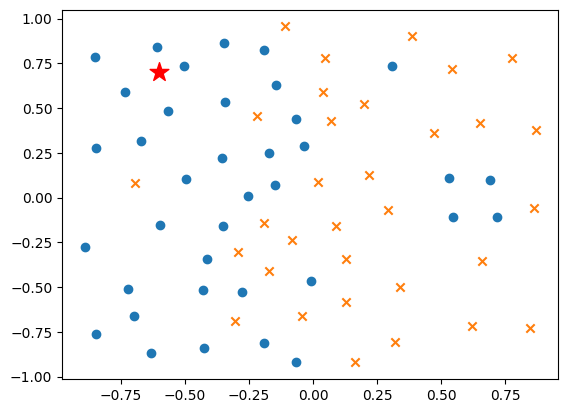

In [47]:
plt.scatter(x[y==0][:,0],x[y==0][:,1],marker='o')
plt.scatter(x[y==1][:,0],x[y==1][:,1],marker='x')
plt.scatter(point[0],point[1],marker='*',s=200,c='r')
plt.show()

In [54]:

locally_weighted_longistic_regression(x, y, point, tau=0.2)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 69)

In [53]:
point1=np.array([-0.6, 0.7])
point2=np.array([0.4, -0.7])
point3=np.array([0.4, 0.0])

Text(0.44, -0.05, '3')

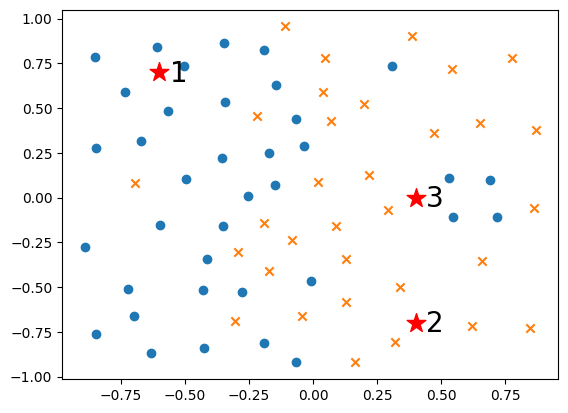

In [22]:
import matplotlib.pyplot as plt
plt.scatter(x[y==0][:,0],x[y==0][:,1],marker='o')
plt.scatter(x[y==1][:,0],x[y==1][:,1],marker='x')

plt.scatter(point1[0],point1[1],marker='*',s=200, c='r')
plt.text(point1[0]+0.04,point1[1]-0.05, '1',size=20)

plt.scatter(point2[0],point2[1],marker='*',s=200, c='r')
plt.text(point2[0]+0.04,point2[1]-0.05, '2',size=20)

plt.scatter(point3[0],point3[1],marker='*',s=200, c='r')
plt.text(point3[0]+0.04,point3[1]-0.05, '3',size=20)



In [26]:
import numpy as np
print('Prediction for point1: %.3f>>class:%d'%(lwlr(x,y,point1),round(lwlr(x,y,point1))))
print('Prediction for point2: %.3f>>class:%d'%(lwlr(x,y,point2),round(lwlr(x,y,point2))))
print('Prediction for point3: %.3f>>class:%d'%(lwlr(x,y,point3),round(lwlr(x,y,point3))))


UnboundLocalError: local variable 'np' referenced before assignment

In [24]:
figure=plt.gcf() #get current figure
figure.set_size_inches(8,8)
def lwlr_grid(X,y,tau,lambd):
    return locally_weighted_longistic_regression(X,y,np.asarray([2*i/(res-1)-1, 2*j/(res-1)-1]),tau,lambd)
def plot_lwlr(X, y, tau, lambd=1e-4,res=50, save=False,idx=0):
    x=np.zeros(2)
    pred=np.ndarray((res, res))
    x0s=2*np.arange(0,res)/(res-1)-1
    x1s=2*np.arange(0,res)/(res-1)-1 
    
    for i in range(res):
        for j in range(res):
            pred[j,i]=locally_weighted_longistic_regression(X, y,[x0s[i],x1s[j]],tau, lambd)
        plt.imshow(pred, extent=[-1, 1, -1, 1], aspect='equal',vmin=0.0, vmax=1.0, origin='lower')
        plt.scatter(X[y==0][:,0],X[y==0][:,1],marker='o')
        plt.scatter(X[y==1][:,0],X[y==1][:,1],marker='x')
        plt.title(r'$w=exp(-1/(2\tau^2)*||x-x_i||^2)$,$\tau $'+'={0:.3f}'.format(tau))
        plt.colorbar()
        
        if save:
                  
              plt.savefig('./Assignment2/43457/{}.png'.format(idx),dpi=100)
              print('Saved ./Assignment2/43457/{}.png'.format(idx))
              plt.close()
              
        else:
         plt.show()
         plot_lwlr(X, y, tau=0.2, lambd=1e-4, res=50)
                
            

<Figure size 800x800 with 0 Axes>